In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [15]:
airbnb = pd.read_csv("data/20240614-London-listings.csv.gz")

airbnb = gpd.GeoDataFrame(airbnb, 
                       geometry=gpd.points_from_xy(airbnb.longitude, airbnb.latitude), 
                       crs="EPSG:4326").to_crs(epsg=27700)

In [16]:
wards = gpd.read_file("data/London-wards-2014/London-wards-2014_ESRI/London_Ward.shp").to_crs(epsg=27700)[["GSS_CODE","HECTARES","geometry"]]

wards.head(5)

,GSS_CODE,HECTARES,geometry
0,E05000405,755.173,"POLYGON ((516401.6 160201.8, 516407.3 160210.5..."
1,E05000414,259.464,"POLYGON ((517829.6 165447.1, 517837.1 165469.4..."
2,E05000401,145.390,"POLYGON ((518107.5 167303.4, 518114.3 167307.5..."
3,E05000400,268.506,"POLYGON ((520480 166909.8, 520490.7 166901.9, ..."
4,E05000402,187.821,"POLYGON ((522071 168144.9, 522063.9 168144, 52..."


In [17]:
travel = pd.read_csv("data/Ward2014PTAI.csv")

travel.head(5)

,Ward Code,Ward Name,AvPTAI2015,PTAL
0,E05000405,Chessington South,1.743083,1a
1,E05000414,Tolworth and Hook Rise,3.644788,1b
2,E05000401,Berrylands,5.655172,2
3,E05000400,Alexandra,3.933086,1b
4,E05000402,Beverley,7.062827,2


In [18]:
pubs = gpd.read_file("data/pubs.geojson").to_crs(epsg=27700)
pubs["geometry"] = pubs.geometry.centroid

pubs = pubs[["name","geometry"]]

pubs.head(5)

,name,geometry
0,The Queens,POINT (530228.555 188568.967)
1,The Gilpin's Bell,POINT (534047.067 191909.103)
2,The Ship and Shovell,POINT (530236.721 180413.513)
3,Crown and Sceptre,POINT (522498.283 179750.168)
4,Princess Victoria,POINT (522169.523 180067.4)


## merging

In [19]:
merged = wards.merge(travel, left_on = "GSS_CODE", right_on = "Ward Code", how = "left")

merged = gpd.GeoDataFrame(merged, crs = "EPSG:27700")

merged.head(5)

,GSS_CODE,HECTARES,geometry,Ward Code,Ward Name,AvPTAI2015,PTAL
0,E05000405,755.173,"POLYGON ((516401.6 160201.8, 516407.3 160210.5...",E05000405,Chessington South,1.743083,1a
1,E05000414,259.464,"POLYGON ((517829.6 165447.1, 517837.1 165469.4...",E05000414,Tolworth and Hook Rise,3.644788,1b
2,E05000401,145.390,"POLYGON ((518107.5 167303.4, 518114.3 167307.5...",E05000401,Berrylands,5.655172,2
3,E05000400,268.506,"POLYGON ((520480 166909.8, 520490.7 166901.9, ...",E05000400,Alexandra,3.933086,1b
4,E05000402,187.821,"POLYGON ((522071 168144.9, 522063.9 168144, 52...",E05000402,Beverley,7.062827,2


In [20]:
merged["n_pubs"] = merged.geometry.apply(lambda geom: sum(pubs.geometry.intersects(geom)))
merged["pub_density"] = merged["n_pubs"] / merged["HECTARES"]

merged["n_airbnb"] = merged.geometry.apply(lambda geom: sum(airbnb.geometry.intersects(geom)))
merged["airbnb_density"] = merged["n_airbnb"] / merged["HECTARES"]


<Axes: >

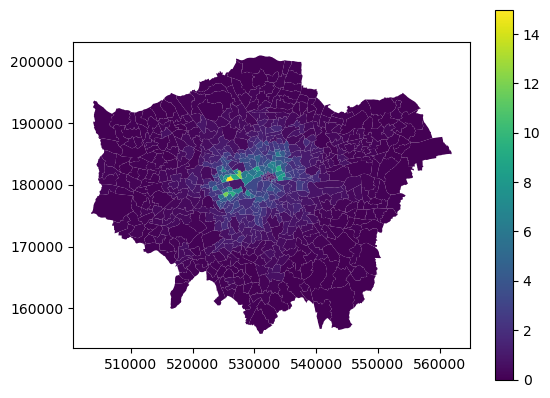

In [21]:
merged.plot(column = "airbnb_density", cmap="viridis", legend = True)

In [27]:
merged.sort_values(by='airbnb_density', ascending=False).head(25)

,GSS_CODE,HECTARES,geometry,Ward Code,Ward Name,AvPTAI2015,PTAL,n_pubs,pub_density,n_airbnb,airbnb_density
479,E05000638,63.082,"POLYGON ((526231.9 181414.8, 526235.5 181411.1...",E05000638,Lancaster Gate,36.412698,6a,9,0.142671,945,14.980502
486,E05000632,72.318,"POLYGON ((527921.9 181967, 527966.7 181831.8, ...",E05000632,Bryanston and Dorset Square,62.320000,6b,15,0.207417,889,12.292928
471,E05009395,48.226,"POLYGON ((524933.5 178522.2, 524954 178535.6, ...",E05009395,Earl's Court,37.895833,6a,6,0.124414,568,11.777879
472,E05009393,61.433,"POLYGON ((525669 178860.7, 525680.3 178860.4, ...",E05009393,Courtfield,33.901639,6a,6,0.097667,576,9.376068
481,E05000636,95.514,"POLYGON ((527761.7 180969.8, 527714.9 180961.8...",E05000636,Hyde Park,52.906250,6b,15,0.157045,884,9.255188
535,E05009335,67.536,"POLYGON ((534407.3 182294.3, 534387 182291.1, ...",E05009335,Weavers,23.838235,5,11,0.162876,625,9.254324
506,E05000141,61.138,"POLYGON ((530326.1 182983.3, 530364.8 182991.4...",E05000141,King's Cross,65.728814,6b,20,0.327129,520,8.505349
532,E05009336,95.978,"POLYGON ((533716.5 180760.5, 533725.5 180759.3...",E05009336,Whitechapel,34.255102,6a,15,0.156286,803,8.366501
491,E05000631,51.949,"POLYGON ((526032.2 181629.4, 526085.3 181567.8...",E05000631,Bayswater,27.102041,6a,7,0.134748,410,7.892356
477,E05009400,38.656,"POLYGON ((524647 180621.7, 524685.2 180640.5, ...",E05009400,Pembridge,33.102564,6a,4,0.103477,300,7.760762
